Logistic Regression on the authenticity of bank notes dataset. The dataset can be found here https://archive.ics.uci.edu/ml/datasets/banknote+authentication. 

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("C:/Users/adity/Desktop/python/data_banknote_authentication.txt", header=None, names=['f1', 'f2', 'f3', 'f4', 'label'])

In [3]:
import torch 
import torch.nn as nn

In [4]:
X = df[['f1', 'f2', 'f3', 'f4']]
y = df['label']

In [5]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(X)

y = y.values


In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)


In [7]:
print(X_train.dtype)
X_train.shape

float64


(1097, 4)

Converting the float64 datatypes to float32.

In [8]:
X_train = torch.tensor(X_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
y_test = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)



Creating the model.

In [9]:
class LogisticRegression(nn.Module):
    def __init__(self, n_input_features):
        super().__init__()
        self.linear = nn.Linear(n_input_features, 1)
    
    def forward(self, x):
        return torch.sigmoid(self.linear(x))

In [28]:
n_input = X_train.shape[1]
model = LogisticRegression(n_input)
model_relu = LogisticRegressionReLU(n_input)
X_train.shape

torch.Size([1097, 4])

In [24]:
criterion = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)

Training loop for sigmoid

In [25]:
num_epoch = 1000
loss_list = []
epoch_list = []

for epoch in range(num_epoch):
    
    outputs = model(X_train)
    loss = criterion(outputs, y_train)

    optimizer.zero_grad
    loss.backward()
    optimizer.step()

    if (epoch+1)%10==0:
        print(f'Epoch: {epoch+1}/{num_epoch}, Loss: {loss.item():.4f}')
        loss_list.append(loss.item())
        epoch_list.append(epoch+1)


Epoch: 10/1000, Loss: 0.6447
Epoch: 20/1000, Loss: 0.6191
Epoch: 30/1000, Loss: 0.5803
Epoch: 40/1000, Loss: 0.5336
Epoch: 50/1000, Loss: 0.4851
Epoch: 60/1000, Loss: 0.4394
Epoch: 70/1000, Loss: 0.3990
Epoch: 80/1000, Loss: 0.3648
Epoch: 90/1000, Loss: 0.3366
Epoch: 100/1000, Loss: 0.3133
Epoch: 110/1000, Loss: 0.2941
Epoch: 120/1000, Loss: 0.2780
Epoch: 130/1000, Loss: 0.2643
Epoch: 140/1000, Loss: 0.2523
Epoch: 150/1000, Loss: 0.2416
Epoch: 160/1000, Loss: 0.2318
Epoch: 170/1000, Loss: 0.2226
Epoch: 180/1000, Loss: 0.2140
Epoch: 190/1000, Loss: 0.2058
Epoch: 200/1000, Loss: 0.1980
Epoch: 210/1000, Loss: 0.1904
Epoch: 220/1000, Loss: 0.1832
Epoch: 230/1000, Loss: 0.1763
Epoch: 240/1000, Loss: 0.1696
Epoch: 250/1000, Loss: 0.1633
Epoch: 260/1000, Loss: 0.1573
Epoch: 270/1000, Loss: 0.1516
Epoch: 280/1000, Loss: 0.1463
Epoch: 290/1000, Loss: 0.1412
Epoch: 300/1000, Loss: 0.1364
Epoch: 310/1000, Loss: 0.1318
Epoch: 320/1000, Loss: 0.1275
Epoch: 330/1000, Loss: 0.1234
Epoch: 340/1000, Lo

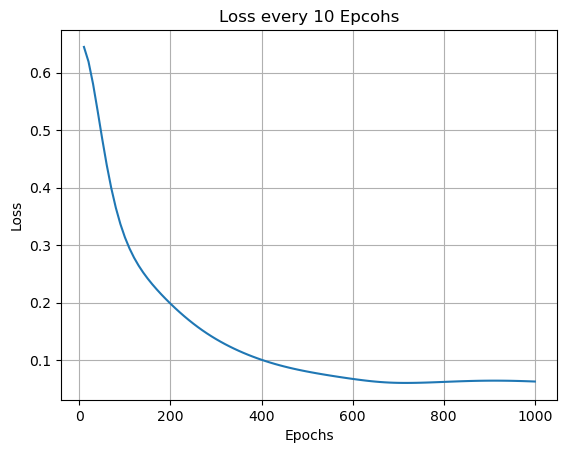

In [26]:
import matplotlib.pyplot as plt

plt.plot(epoch_list, loss_list)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss every 10 Epcohs")
plt.grid(True)
plt.show()

In [27]:
with torch.no_grad():
    y_pred = model(X_test)
    predicted = (y_pred > 0.5).float()
    accuracy = (predicted == y_test).float().mean()
    print(f'Accuracy: {accuracy.item()*100:.2f}')

Accuracy: 98.18
